# Title: Amongst seniors in Hungary and Switzerland, who has healthier hearts?

## Introduction (Kevin)
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


*INTRO TEXT GOES HERE*

## Preliminary exploratory data analysis (Chloe)
- Demonstrate that the dataset can be read from the web into R (✅)
- Clean and wrangle your data into a tidy format (✅)
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class （✅）, the means of the predictor variables you plan to use in your analysis（✖️） and how many rows have missing data（✅）
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [5]:
#PRELIMINARY EXPLORATORY DATA ANALYSIS CODE HERE

In [25]:
# necessary library
library(tidyverse)
library(readr)
library(tidymodels)

In [48]:
# read data
heart_data <- read_csv("data/processed.cleveland.data", 
                 col_names = c("age", "sex", "cp", "trestbps", 
                               "chol", "fbs", "restecg", "thalach", "exang", 
                               "oldpeak", "slope", "ca", "thal", "disease"), na = "?")
# turn integer to factor (to categorical data)
heart_data <- heart_data |>
        mutate(sex = as_factor(sex), cp = as_factor(cp), fbs = as_factor(fbs), restecg = as_factor(restecg), 
               exang = as_factor(exang), slope = as_factor(slope), thal = as_factor(thal), disease = as_factor(disease))

head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [49]:
set.seed(8888)
# split data into training and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [50]:
#locate missing data (training data)
train_missing_column <- colSums(is.na(heart_train))
locate_missing_train <- which(!complete.cases(heart_train))
sum_missing_train <- sum(is.na(heart_train))

cat("Summary of Missing Data in Training Data ")
cat("Number of Missing Data in Each Column: \n")
train_missing_column
cat("Location of Rows That Have Missing Data: ", locate_missing_train, "\n")
cat("Number of Rows That have Missing Data: ", sum_missing_train)

Summary of Missing Data in Training Data Number of Missing Data in Each Column: 


age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal  disease 
       0        0        0        3        2        0

Location of Rows That Have Missing Data:  34 67 119 152 187 
Number of Rows That have Missing Data:  5

In [51]:
# Frequency of Each Class
cat("Frequency of Each Class (0 = Healthy, 1-4 = Sick): \n")
table(heart_data$disease)
#Proportion of Each Class
cat("Proportion of Each Class (0 = Healthy, 1-4 = Sick): \n")
prop.table(table(heart_data$disease))

Frequency of Each Class (0 = Healthy, 1-4 = Sick): 



  0   1   2   3   4 
164  55  36  35  13 

Proportion of Each Class (0 = Healthy, 1-4 = Sick): 



         0          1          2          3          4 
0.54125413 0.18151815 0.11881188 0.11551155 0.04290429 

The box-plots does not overlap, maximum heart rate achieved is statistical significant in determine heart disease.

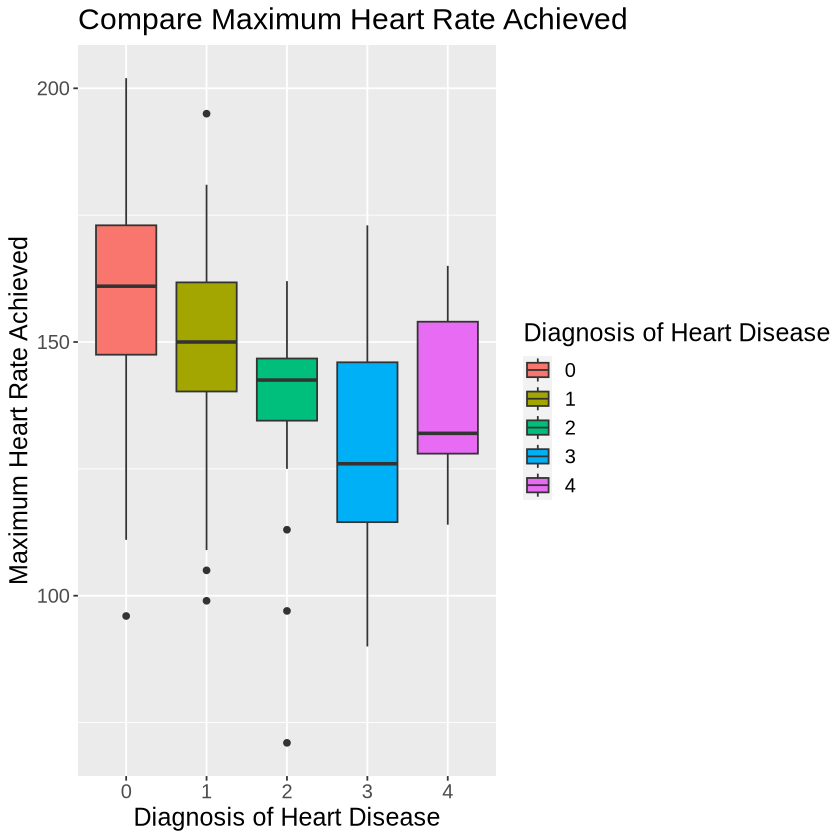

The box-plots overlap, serum cholestoral level is not statistical significant in determine heart disease.

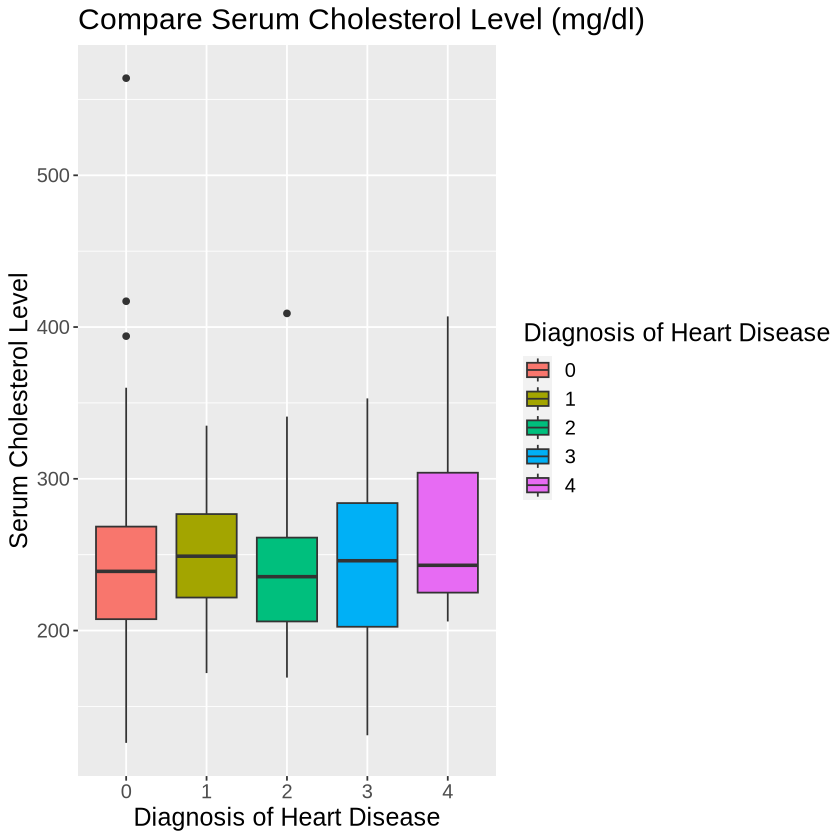

The box-plots do not overlap, depression induced by exercise relative to rest is statistical significant in determine heart disease.

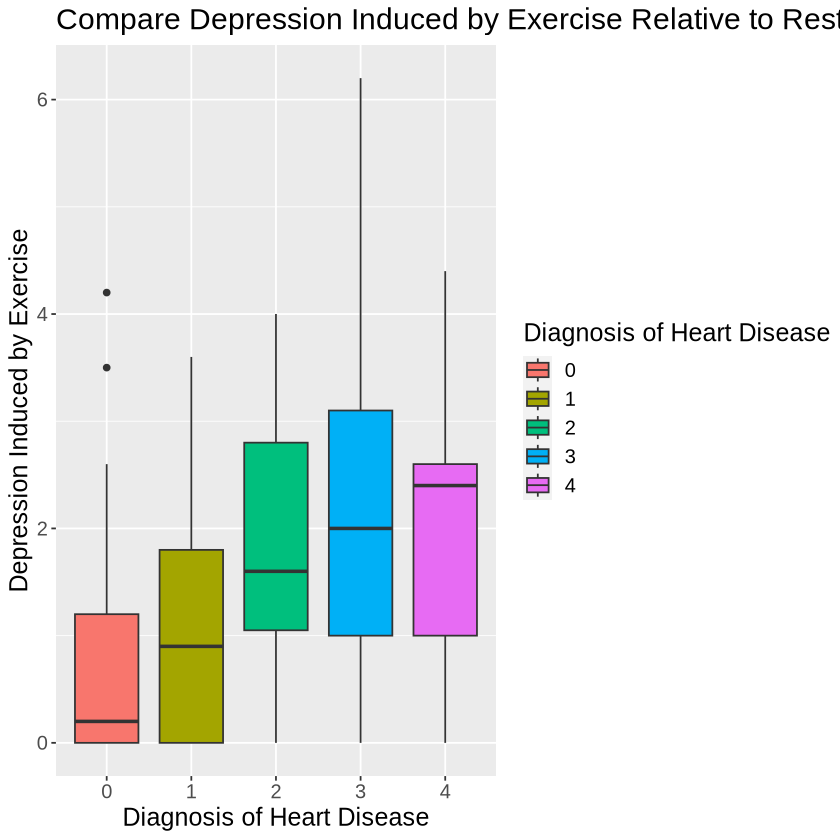

The box-plots overlap, resting blood pressure  is not statistical significant in determine heart disease.

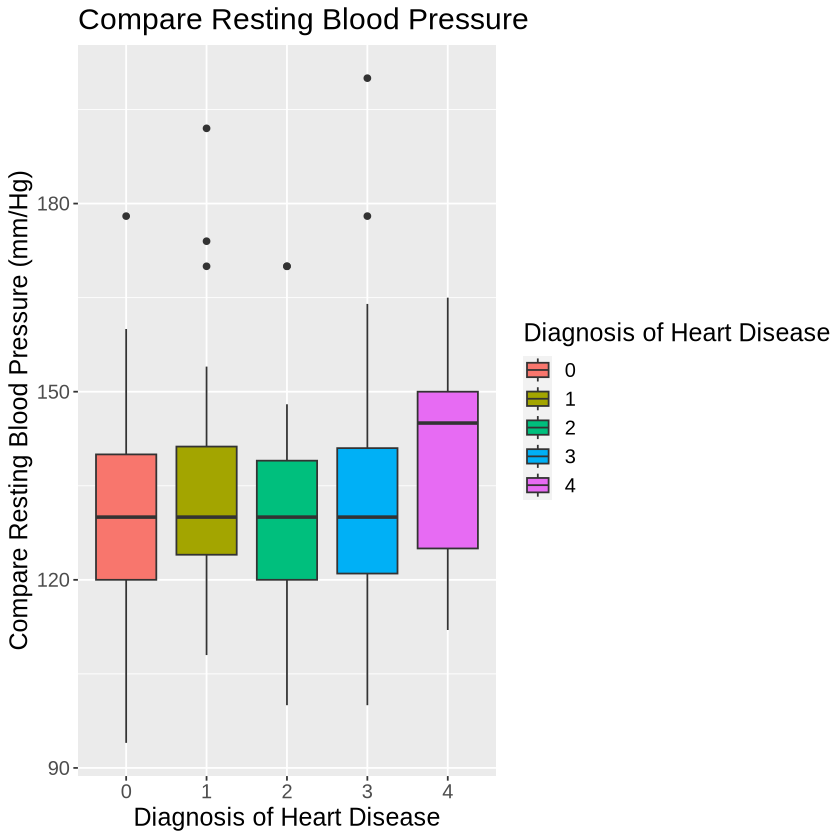

In [81]:
# Visualization (boxplots)
#compare thalach 
thalach_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = thalach, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Maximum Heart Rate Achieved",
       x = "Diagnosis of Heart Disease", 
       y = "Maximum Heart Rate Achieved",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
thalach_boxplot

cat("The box-plots does not overlap, maximum heart rate achieved is statistical significant in determine heart disease.")


#compare serum cholestoral level between sick or not
chol_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = chol, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Serum Cholesterol Level (mg/dl)",
       x = "Diagnosis of Heart Disease",
       y = "Serum Cholesterol Level",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
chol_boxplot

cat("The box-plots overlap, serum cholestoral level is not statistical significant in determine heart disease.")

#compare ST depression induced by exercise relative to rest between sick or not
oldpeak_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = oldpeak, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Depression Induced by Exercise Relative to Rest",
       x = "Diagnosis of Heart Disease",
       y = "Depression Induced by Exercise",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
oldpeak_boxplot

cat("The box-plots do not overlap, depression induced by exercise relative to rest is statistical significant in determine heart disease.")

trestbps_boxplot <- heart_train |>
  ggplot(aes(x = disease, y = trestbps, group = disease)) +
  geom_boxplot(aes(fill = disease)) +
  labs(title = "Compare Resting Blood Pressure",
       x = "Diagnosis of Heart Disease",
       y = "Compare Resting Blood Pressure (mm/Hg)",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
trestbps_boxplot

cat("The box-plots overlap, resting blood pressure  is not statistical significant in determine heart disease.")


disease,prop_exang,prop_fbs
<fct>,<dbl>,<dbl>
0,0.1219512,0.1544715
1,0.4750000,0.1000000
2,0.5769231,0.2692308
3,0.7037037,0.1851852
4,0.2222222,0.1111111


The proportion of people who has exercise induced angina is generally higher in groups of people who has heart disease

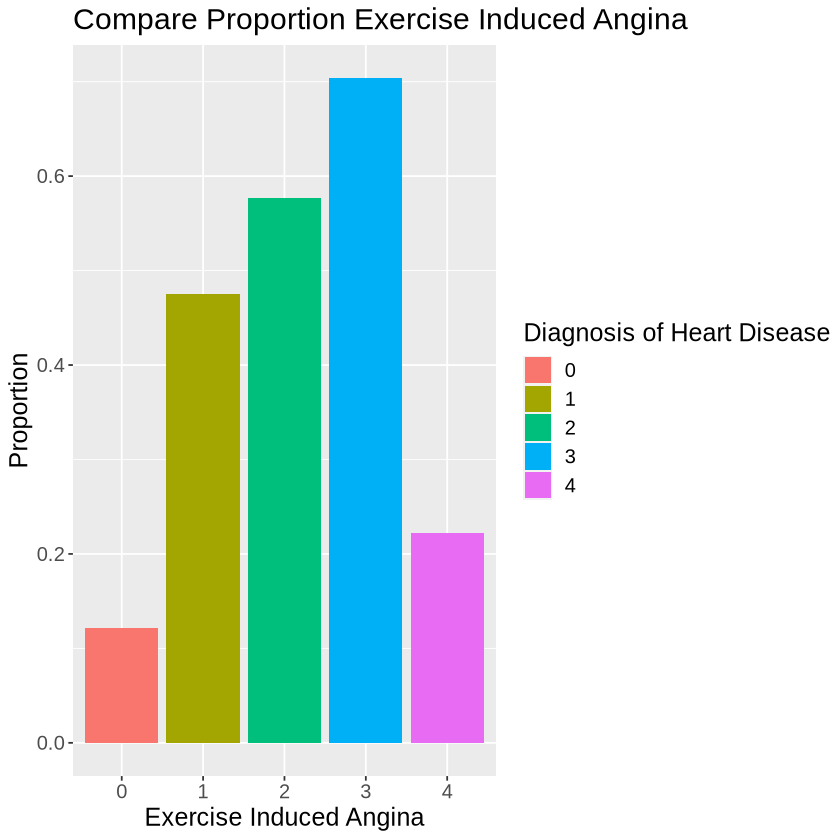

The proportion of people who has fasting blood sugar > 120 mg/dl is approximatly the same in groups of people who has heart disease

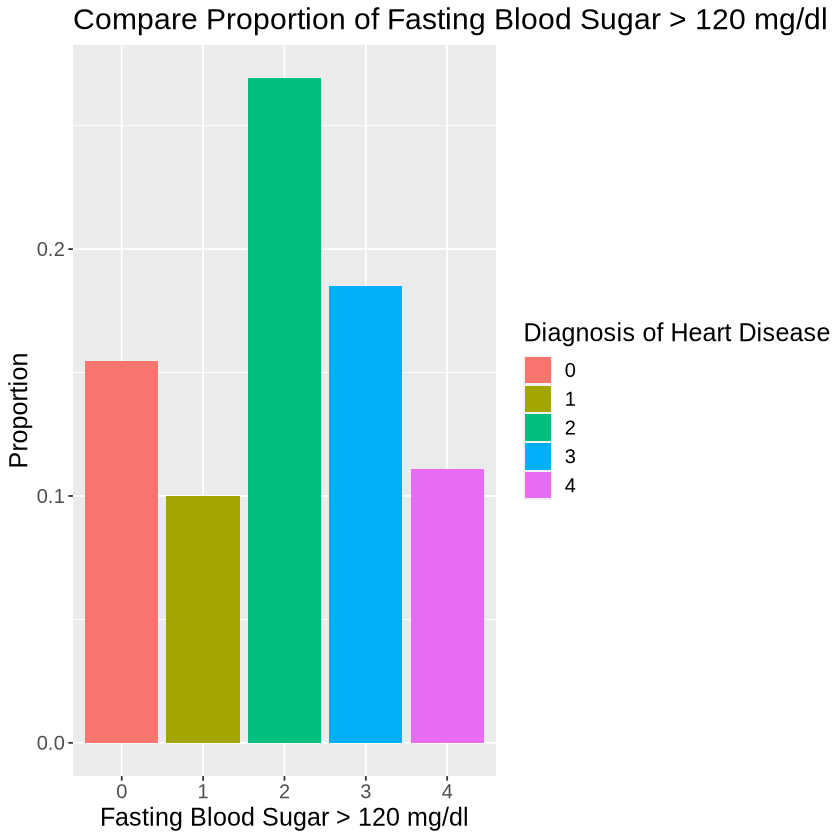

In [97]:
# Visualization (boxplots)
prop_heart <- heart_train|>
    group_by(disease) |>
    summarize(prop_exang = mean(exang == 1), prop_fbs = mean(fbs == 1))
head(prop_heart)
exang_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_exang, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Compare Proportion Exercise Induced Angina",
       x = "Exercise Induced Angina", 
       y = "Proportion",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
exang_bar

cat("The proportion of people who has exercise induced angina is generally higher in groups of people who has heart disease")

fbs_bar <- prop_heart |>
  ggplot(aes(x = disease, y = prop_fbs, fill = disease)) +
  geom_bar(stat = "identity") +
  labs(title = "Compare Proportion of Fasting Blood Sugar > 120 mg/dl",
       x = "Fasting Blood Sugar > 120 mg/dl", 
       y = "Proportion",
       fill = "Diagnosis of Heart Disease") +
       theme(text = element_text(size = 15))
fbs_bar

cat("The proportion of people who has fasting blood sugar > 120 mg/dl is approximatly the same in groups of people who has heart disease")


## Methods (Tom):
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

*METHODS TEXT GOES SURE*

## Expected outcomes and significance (Michael):
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

*EXPECTED OUTCOMES TEXT GOES HERE*